In [3]:
import pandas as pd
import numpy as np


In [8]:
df=pd.read_csv('spam.csv' , encoding='latin-1')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.sample(5)

,v1,v2
1201,ham,I know she called me
1448,spam,As a registered optin subscriber ur draw 4 å£1...
4173,ham,And pls pls drink plenty plenty water
4604,ham,"I need an 8th but I'm off campus atm, could I ..."
683,spam,Hi I'm sue. I am 20 years old and work as a la...


In [12]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [13]:
df.sample(5)

,target,text
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...
5102,spam,This msg is for your mobile content order It h...
4565,ham,Should i buy him a blackberry bold 2 or torch....
5233,ham,Hey what how about your project. Started aha da.
2736,ham,Really? I crashed out cuddled on my sofa.


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])

In [16]:
df['target']

,target
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [17]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df.isnull().sum()

,0
target,0
text,0


In [19]:
df.duplicated().sum()

np.int64(403)

In [20]:
df= df.drop_duplicates(keep='first')

In [21]:
df.duplicated().sum()

np.int64(0)

In [22]:
df['target'].value_counts()

,count
target,
0,4516
1,653


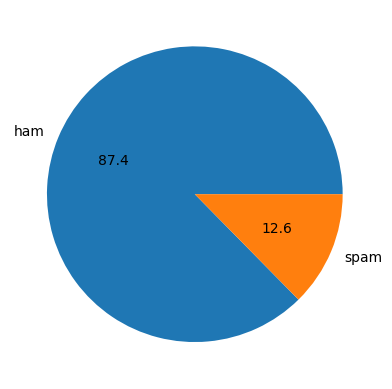

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.1f")
plt.show()

In [24]:
pip install nltk

In [25]:
import nltk

In [26]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
df['Characters']=df['text'].apply(len)

In [28]:
df.head(5)

,target,text,Characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['Words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,Characters,Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
df['Sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,Characters,Words,Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['Characters','Words','Sentence']].describe()

,Characters,Words,Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
df[df['target'] == 0][['Characters','Words','Sentence']].describe()

,Characters,Words,Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [43]:
df[df['target'] == 1][['Characters','Words','Sentence']].describe()

,Characters,Words,Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
import seaborn as sns


<Axes: xlabel='Characters', ylabel='Count'>

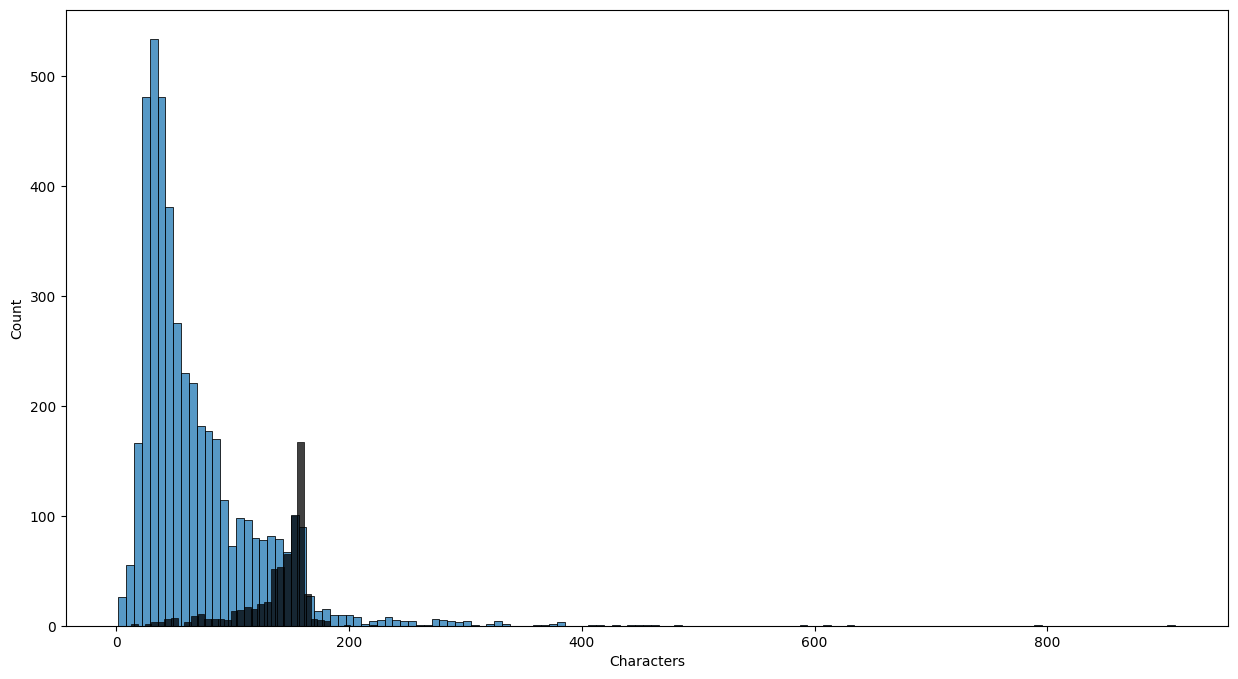

In [52]:
plt.figure(figsize=(15,8))
sns.histplot(df[df['target']==0]['Characters'])
sns.histplot(df[df['target']==1]['Characters'], color='black')

<Axes: xlabel='Words', ylabel='Count'>

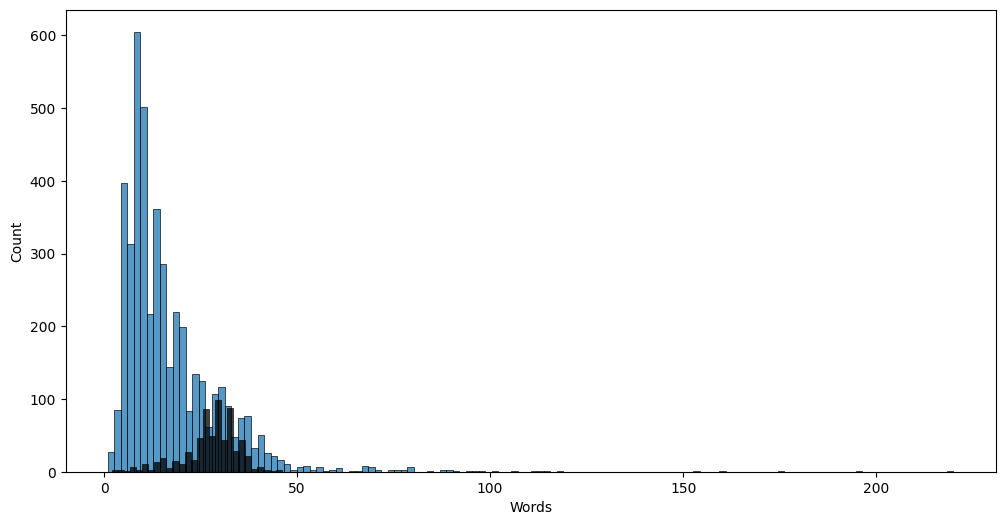

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['Words'])
sns.histplot(df[df['target'] == 1]['Words'],color='black')

<Axes: xlabel='Sentence', ylabel='Count'>

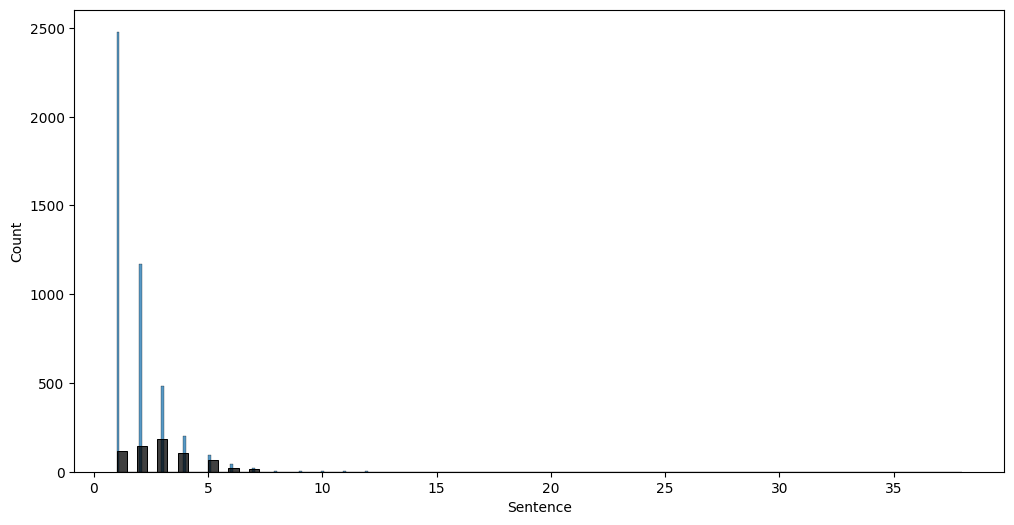

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['Sentence'])
sns.histplot(df[df['target']==1]['Sentence'], color='black')

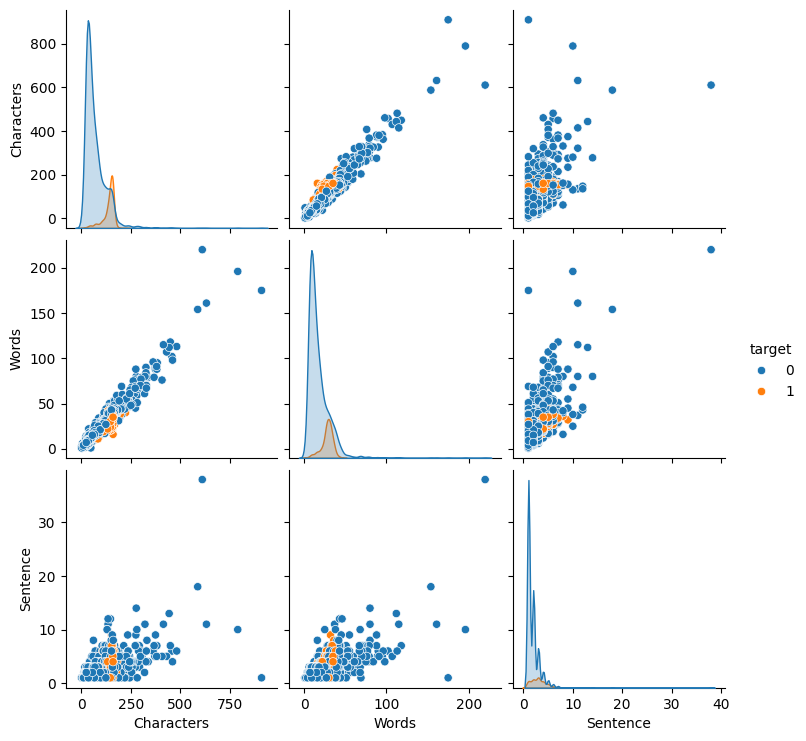

In [59]:
sns.pairplot(df,hue='target')

<Axes: >

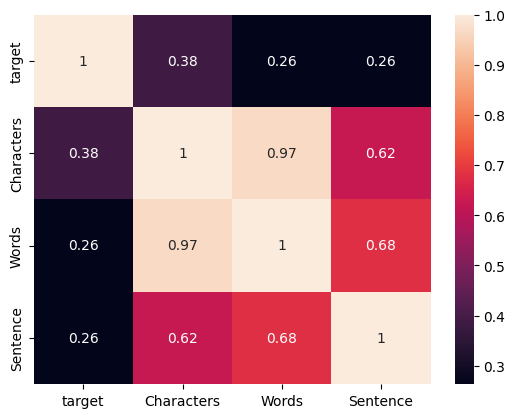

In [62]:
#numerical features
numerical_features = ['target', 'Characters', 'Words', 'Sentence']
sns.heatmap(df[numerical_features].corr(), annot=True)

In [64]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

        text = y[:]
        y.clear()
        for i in text:
          if i not in stopwords.words('english'):
            y.append(i)

            text = y[:]
            y.clear()
            for i in text:
              y.append(ps.stem(i))


    return  " ".join(y)

In [67]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [98]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words ('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [68]:
transform_text('i love programing laugauge. How about you ?')

'love program laugaug'

In [83]:
ps.stem('programing')

'program'

In [72]:
df['transformed_text'] = df['text'].apply(transform_text)


In [73]:
df.head()

,target,text,Characters,Words,Sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [75]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [76]:
len(spam_corpus)

9930

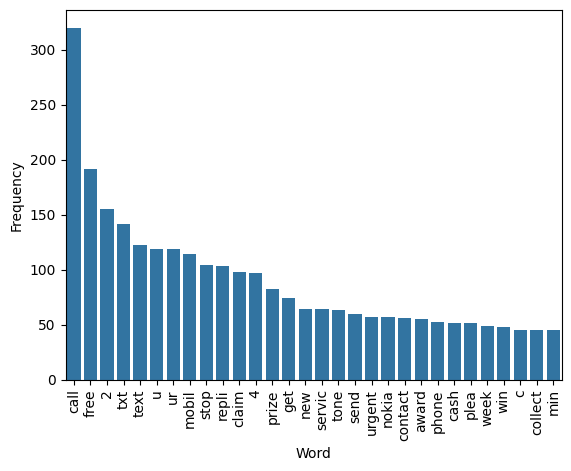

In [78]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Counter object to a DataFrame
spam_corpus_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the barplot using the 'x' and 'y' keywords
sns.barplot(x='Word', y='Frequency', data=spam_corpus_df)
plt.xticks(rotation='vertical')
plt.show()

In [79]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [80]:
len(ham_corpus)

35296

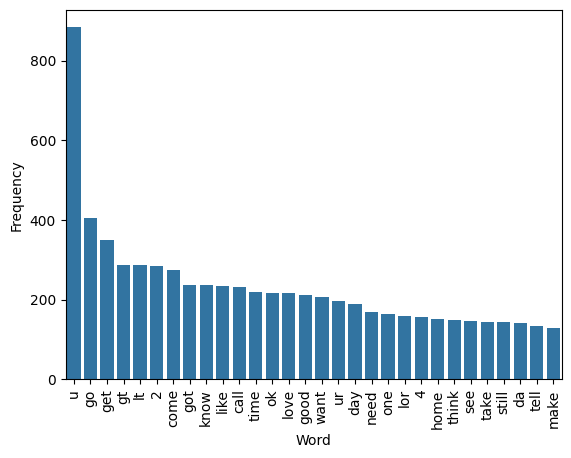

In [82]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Counter object to a DataFrame
ham_corpus_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Create the barplot using the 'x' and 'y' keywords
sns.barplot(x='Word', y='Frequency', data=ham_corpus_df) # Pass the DataFrame as 'data' and specify 'x' and 'y'
plt.xticks(rotation='vertical')
plt.show()

In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [124]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [125]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
y= df['target'].values

In [127]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [130]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [131]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [132]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211
0.8188405797101449
0.6348314606741573


In [133]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))


0.971953578336557
[[896   0]
 [ 29 109]]
1.0
0.7898550724637681
0.8825910931174089


In [134]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187
0.8840579710144928
0.9348659003831418


In [135]:
f1_score = [f1_score(y_test, y_pred1), f1_score(y_test, y_pred2), f1_score(y_test, y_pred3)]

In [136]:
f1_score

[0.6348314606741573, 0.8825910931174089, 0.9348659003831418]

In [137]:
recall_score = [recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3)]

In [138]:
recall_score

[0.8188405797101449, 0.7898550724637681, 0.8840579710144928]

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [140]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [141]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [142]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [143]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748549323017408, 0.9745762711864406)

In [144]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8380952380952381
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9494949494949495
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.960348162475822
Precision -  0.8702290076335878
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.93
For  xgb
Accuracy -  0.9709864603481625
Precision -  0.9285714285714286


In [146]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [122]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.970019,1.000000
0,SVC,0.974855,0.974576
8,ETC,0.973888,0.974359
4,LR,0.952611,0.949495
9,GBDT,0.949710,0.930000
10,xgb,0.970986,0.928571
7,BgC,0.960348,0.870229
6,AdaBoost,0.924565,0.840909


In [147]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [148]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [149]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [150]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [151]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [152]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
3,SVC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,ETC,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359
5,LR,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495,0.952611,0.949495
6,GBDT,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000,0.949710,0.930000
7,xgb,0.970986,0.928571,0.970986,0.928571,0.970986,0.928571,0.970986,0.928571
8,BgC,0.960348,0.870229,0.960348,0.870229,0.960348,0.870229,0.960348,0.870229
9,AdaBoost,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909,0.924565,0.840909


In [153]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [154]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [155]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [156]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 0.9915254237288136


In [159]:
from sklearn.ensemble import StackingClassifier

estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [160]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 0.9285714285714286


In [161]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))